In [45]:
# Installing and importing the required packages

library(lubridate) # library to help work with dates
install.packages("scales") # Scale Functions for Visualization
library(scales)

install.packages("tidyverse") # Collection of packages to model, transform, and visualize data
library(tidyverse) # for declaratively creating graphics
library(dplyr)

install.packages("cowplot")
library(cowplot) # Arrange 2 plots side-by-side https://stackoverflow.com/a/31223588/9332260

Warning message:
"package 'scales' is in use and will not be installed"Warning message:
"package 'tidyverse' is in use and will not be installed"Warning message:
"package 'cowplot' is in use and will not be installed"

# Exploratory Data Analysis: COVID-19

In this notebook, we perform a self expertimentation of Exploratory Data Analysis(EDA) of Denmark's COVID-19 cases.

## 1. Identify business problem

The first step to Exploratory Data Analysis (EDA) is to identify the business problem. The business case revolves around the understanding of the situation and the use of data to prevent spread of COVID-19 virus in Denmark. The aim is to analyze the data and compare against the decisions made and enforced by the officials and the health experts, primarily the two lockdowns from March and Decemberof 2020. This EDA is not a solution to the problem but the ambition is to understand if gathering factual data aided in effective decision making by the authorities. 

## 2. Data collection

The dataset used for this analysis can be found at [Our World in Data](https://ourworldindata.org/coronavirus/country/denmark?country=~DNK), which is a scientific online publication focusing on global problems. Its research team is based at the University of Oxford, whose work are based on global community of scholars (**cite: About us**). They claim to have the data for COVID-19 used in this analysis updated daily and have made it available to use freely. They also cite the source of raw data for COVID-19 Data Repository to be the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University. (**cite**).

# Refactor
~## 3. Data preparation~

~The data from Statistikbanken is made available in multiple formats so people can choose how they want the data, for example: an Excel sheet or a plain text file. For this analaysis, we chose to use the data as a CSV (comma-separated value) file for ease of use. In the following steps, we will go through the process of tidying data and preparing it for the analysis.~


### 3.1 Load the data into R and inspect

The first step is to load the raw data into R and inspect if it is workable and understandable. If not, we must proceed to transform the data. Without a clear understanding of data, the anaylsis is pointless.

In [66]:
list.files(".")

[1] "EDA-COVID.ipynb"      "world_covid_data.csv"

In [67]:
# Create a dataframe by reading the file containing the dataset

world_covid_data <- read.csv("world_covid_data.csv", encoding="UTF-8")

In [68]:
# Check if the data for the country we're interested in (Denmark), exists

"Denmark" %in% world_covid_data$location
"Wakanda" %in% world_covid_data$location # Failing test for sanity check

[1] TRUE

[1] FALSE

In [69]:
# use dplyr library to filter data where location is Denmark

denmark_covid_data <- filter(world_covid_data, location == "Denmark")

### 3.2 Initial inspection feedback

We loaded the data into R and print the first few rows of data for inspection. Immediately, we can come to a conclusion that data transformation is needed. The number of transformation required is subjective, which could be based on the requirements,  people responsible for data analysis and target audience, among many others. As for our need, we came up with a list of transformations required: 
1. The key indicators are in Danish, should be translated to English as the target audience is global.
2. The timeline is horizontal, should be transposed such that the timeline is vertical and the key indicators are the first values of the columns.
3. The date is recorded as `MxxDxx`, should be transformed to ISO 8601 date format `yyyy-mm-dd` as it is the international standard.
4. The missing values are noted as `..`, should be replaced with `NA` as that is what R understands as missing values.

### 3.3 Data transformation

After realization of the need of data transformation, we continue to do so in this step. As the dataset is not very large, we used Google Sheets (an alternative to Microsoft Excel) to transfrom the data, as it provided all the necessary tools out of the box.

We proceeded to tackle the issues in the same order as listed above.

Firstly, the task to translate the key indicators for Danish to English was simple enough, with the help of technology and native Danish speakers to verify.

The next step was to transpose, or rotate, the data from rows to columns. This helped to adjust the timeline from being horizontal to vertical. Additionally, this step moved the key indicators to be inital values of the columns, just as we needed it to be.

The third step was tedious for manual transformation. The goal was to transform data from `M03D21` to `2020-03-21`. Since the original value was fairly organised, i.e. "`M`(month index)`D`(date index)", we could harness the power of formulas to transform the data. To do so was a 2-step process. Replacing `M` with `2020-` and replacing `D` with `-` in 2 separate columns with the `=REPLACE(text, position, length, new_text)` function.

The final step was to `Find and Replace` the data `..` to `NA`.

The file `COVID-data-transformed.csv` steps was the output of this data transformation.

In [70]:
list.files(".")

[1] "EDA-COVID.ipynb"      "world_covid_data.csv"

### 3.4 Verify and update data types

Here, we check the data types of the data loaded onto R. Since we load the data from a CSV file, R does not know what type of data certain inputs are. By default, it categorises unknown data types as `Factor` as they can store both strings and integers.
After inspecting the data types as understood by R, we need to update them, as necessary, to characters, date and integers.

In [71]:
str(denmark_covid_data)

'data.frame':	323 obs. of  50 variables:
 $ iso_code                          : Factor w/ 192 levels "","AFG","AGO",..: 49 49 49 49 49 49 49 49 49 49 ...
 $ continent                         : Factor w/ 7 levels "","Africa","Asia",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ location                          : Factor w/ 192 levels "Afghanistan",..: 47 47 47 47 47 47 47 47 47 47 ...
 $ date                              : Factor w/ 345 levels "2020-01-01","2020-01-02",..: 23 24 25 26 27 28 29 30 31 32 ...
 $ total_cases                       : num  NA NA NA NA NA NA NA NA NA NA ...
 $ new_cases                         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ new_cases_smoothed                : num  NA NA NA NA NA 0 0 0 0 0 ...
 $ total_deaths                      : num  NA NA NA NA NA NA NA NA NA NA ...
 $ new_deaths                        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ new_deaths_smoothed               : num  NA NA NA NA NA 0 0 0 0 0 ...
 $ total_cases_per_million           : num  NA NA NA NA NA NA NA NA

In [73]:
denmark_covid_data$iso_code <- as.character(denmark_covid_data$iso_code)
denmark_covid_data$continent <- as.character(denmark_covid_data$continent)
denmark_covid_data$location <- as.character(denmark_covid_data$location)
denmark_covid_data$date <- ymd(denmark_covid_data$date)
denmark_covid_data$tests_units <- as.character(denmark_covid_data$tests_units)
denmark_covid_data$total_deaths <- as.integer(denmark_covid_data$total_deaths)

## 4. Map data on graph

Now that we have changed the data types of the input data, we can start analyzing the data and gain understanding from it. To plot the data, we use the library `tidyverse` because of its flexibility and customization properties.

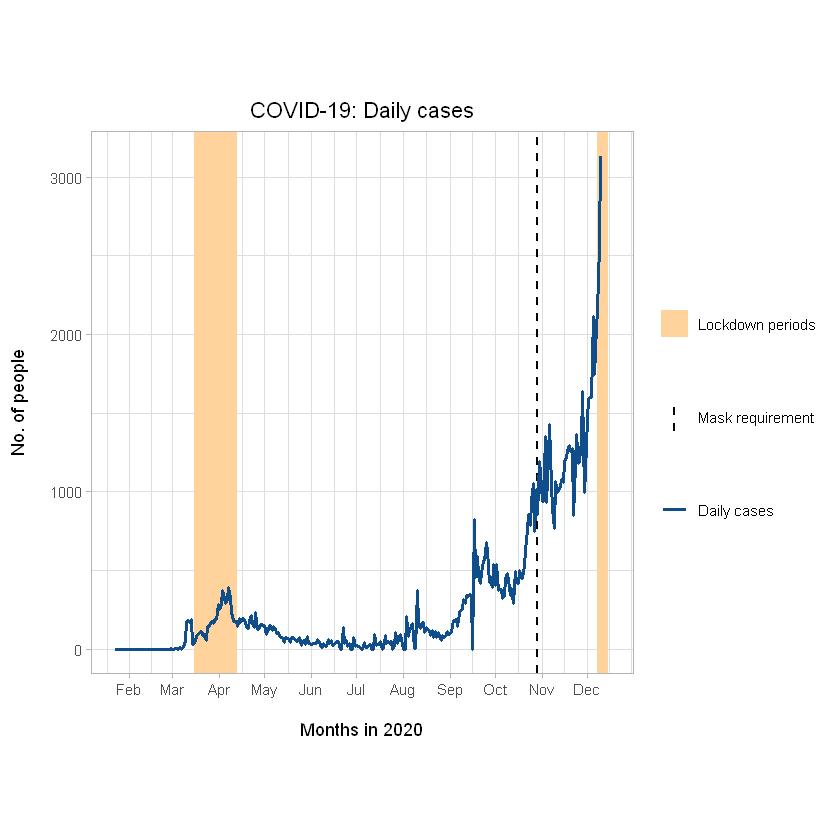

In [84]:
# Daily cases

ggplot(denmark_covid_data, aes(x = date)) +

geom_rect(aes(                                                             # Rectangular shade for emphasizing on lockdown #1
    xmin = as.Date("2020-03-15"),
    xmax = as.Date("2020-04-13"),
    ymin = -Inf, ymax = Inf, fill = "Lockdown period")) +
geom_rect(aes(                                                             # Rectangular shade for emphasizing on lockdown #2
    xmin = as.Date("2020-12-08"),
    xmax = as.Date("2020-12-15"),
    ymin = -Inf, ymax = Inf, fill = "Lockdown period")) +
geom_vline(aes(                                                            # Vertical dashed line
    xintercept = as.Date("2020-10-29"),
    linetype = "Break"),
           color = "black",
           lwd = 0.7
          ) +


geom_line(aes(y = new_cases, color = "dodgerblue4"), lwd = 1) +
scale_x_date(breaks = date_breaks("1 months"), date_labels = "%b") +       # Improving the x-axis to show all months
theme_light() +

xlab("\nMonths in 2020") +                                                 # Label for x-axis
scale_y_continuous("No. of people\n") +                                    # Label for y-axis

ggtitle("COVID-19: Daily cases") +                          # Title for the plot
theme(plot.title = element_text(hjust = 0.5)) +                            # Center the title
scale_fill_manual(name = "",                                               # Legend for the rectangular shade
                  values="burlywood1",
                  labels=c("Lockdown periods")) +
scale_color_identity(name = "",                                            # Legend for the line plots
                     breaks = c("dodgerblue4"),
                     labels = c("Daily cases"),
                     guide = "legend") +
scale_linetype_manual(name = "",                                           # Legend for the vertical dotted line
                      values = c("Break" = "dashed"),
                      labels = c("Mask requirement")) + 
theme(aspect.ratio=1)                                                      # Fixing aspect ratio

### 4.1 Deaths, hospitalized and lockdowns

Starting with one of the most meaningful and significant plotting, we analyze the data for the number of deaths and hospitalized. Along with that, we also emphasize on the 2 lockdowns enforced by the state officials, the first one from March 15, 2020 to April 13, 2020 and the recent one starting from December 9, 2020 onwards.

Warning message:
"Removed 51 row(s) containing missing values (geom_path)."Warning message:
"Removed 57 row(s) containing missing values (geom_path)."

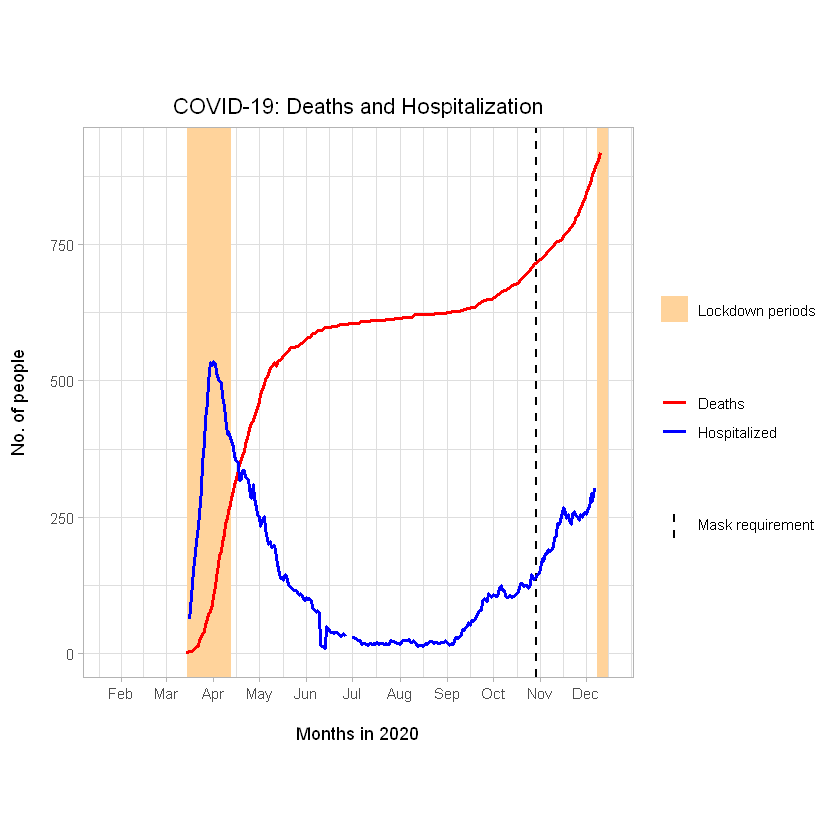

In [89]:
ggplot(denmark_covid_data, aes(x = date)) +                           # Specify the data frame and x-axis for the plot
geom_rect(aes(                                                             # Rectangular shade for emphasizing on lockdown #1
    xmin = as.Date("2020-03-15"),
    xmax = as.Date("2020-04-13"),
    ymin = -Inf, ymax = Inf, fill = "Lockdown period")) +
geom_rect(aes(                                                             # Rectangular shade for emphasizing on lockdown #2
    xmin = as.Date("2020-12-08"),
    xmax = as.Date("2020-12-15"),
    ymin = -Inf, ymax = Inf, fill = "Lockdown period")) +

geom_vline(aes(                                                            # Vertical dashed line
    xintercept = as.Date("2020-10-29"),
    linetype = "Break"),
           color = "black",
           lwd = 0.7
          ) +

geom_line(aes(y = total_deaths, color = "red"), lwd = 1) +                  # Line plot for deaths
geom_line(aes(y = hosp_patients, color = "blue"), lwd = 1) +           # line plot for hospitalized

scale_x_date(breaks = date_breaks("1 months"), date_labels = "%b") +       # Improving the x-axis to show all months
theme_light() +

xlab("\nMonths in 2020") +                                                 # Label for x-axis
scale_y_continuous("No. of people\n") +                                    # Label for y-axis

ggtitle("COVID-19: Deaths and Hospitalization") +                          # Title for the plot
theme(plot.title = element_text(hjust = 0.5)) +                            # Center the title
scale_fill_manual(name = "",                                               # Legend for the rectangular shade
                  values="burlywood1",
                  labels=c("Lockdown periods")) +
scale_color_identity(name = "",                                            # Legend for the line plots
                     breaks = c("red", "blue"),
                     labels = c("Deaths", "Hospitalized"),
                     guide = "legend") +
scale_linetype_manual(name = "",                                           # Legend for the vertical dotted line
                      values = c("Break" = "dashed"),
                      labels = c("Mask requirement")) + 
theme(aspect.ratio=1)                                                      # Fixing aspect ratio

After the initial plotting, it is clear that there was a strong impact of COVID-19 around late March--early April. The number of people who were dying due to COVID-19, as indicated by red line, and who were hospitalized, as indicated by the blue line, increased sharply. The first, month-long lockdown was imposed during this period, as indicated by the soft-orange shade. The result of the lockdown was effective as the number of reported hospitalization started to decline and kept declining over the next few months. The number of deaths was still rising at the end of the first lockdown, but started to stabilize soon after.

This was a positive indication that the imposed lockdown was effective in controlling the spread of the virus.

As the restictions started to loosen up, the public started to gather in larger numbers, which was an opportunity for the virus to spread again. This is indicated by the rise on both total deaths and hospitalized starting September. To control the rapid increase, the government mandated the use of mask on all public places starting October 29, represented by the black, dashed line.

Ever since, the numbers started to grow. The plot above shows a sharp incline starting November. And with the holidays starting, the government imposed second lockdown starting December 09, 2020, which is the date of conducting this experiment. This was an attempt to reduce the number of gatherings and parties, and limit them to families to control the spread of the COVID-19.

### 4.2 Total confirmed cased and total tested

Warning message:
"Removed 5 row(s) containing missing values (geom_path)."Warning message:
"Removed 35 row(s) containing missing values (geom_path)."Warning message:
"Removed 5 row(s) containing missing values (geom_path)."Warning message:
"Removed 35 row(s) containing missing values (geom_path)."

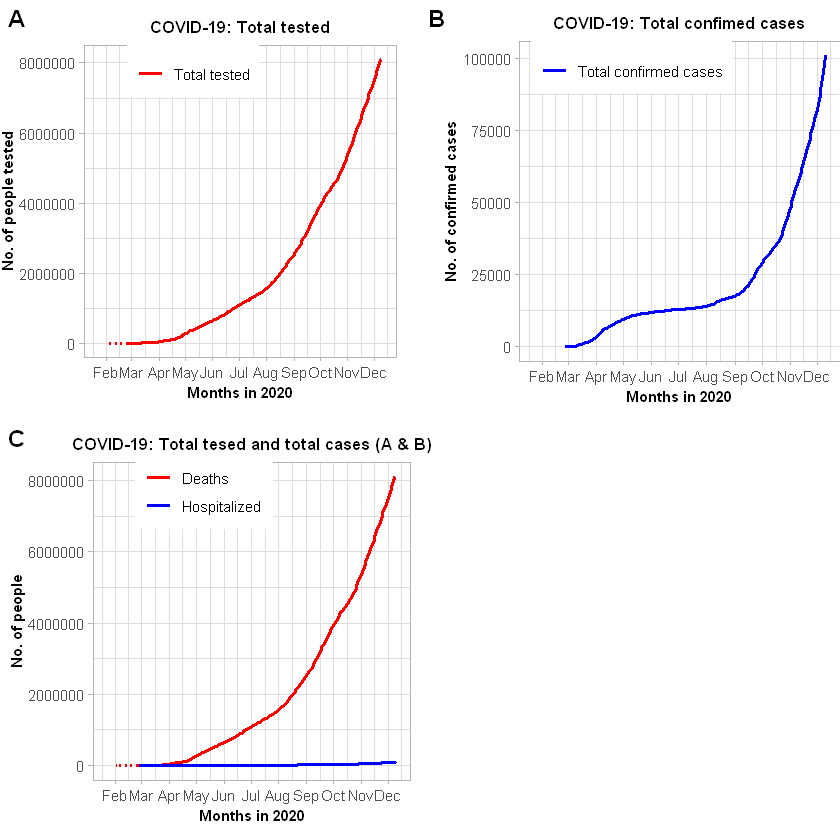

In [76]:
##########################################################################################################################
############ Step 1: First we create a plot "A" for total number of people tested and assign it to a variable ############
##########################################################################################################################

TotalTestedPlot <- ggplot(denmark_covid_data, aes(x = date)) +            # Specify the data frame and x-axis for the plot

geom_line(aes(y = total_tests, color = "red"), lwd = 1) +          # Line plot for total number of peple tested
scale_x_date(breaks = date_breaks("1 months"), date_labels = "%b") +           # Improving the x-axis to show all months
theme_light() +

xlab("Months in 2020") +                                                       # Label for x-axis
scale_y_continuous("No. of people tested",                                     # Label for y-axis
                   labels = function(x) format(x, scientific = FALSE)          # Change from exponentials to human readable numbers
                   ) +

ggtitle("COVID-19: Total tested") +                                            # Title for the plot A
theme(plot.title = element_text(hjust = 0.5, size = 10, face="bold")) +        # Center the title

scale_color_identity(name = "",                                                # Legend for the line plot
                     breaks = "red",
                     labels = "Total tested",
                     guide = "legend"
                     ) +

theme(aspect.ratio=1) +                                                        # Fix aspect ratio
theme(legend.position=c(0.35, 0.95)) +                                         # Append the legend inside the plot
theme(plot.margin=unit(c(0,0.5,0,0),"cm")) +                                   # Increase right margin so there's space between A & B
theme(axis.title = element_text(size = rel(0.8), face="bold"))



##########################################################################################################################
############Step 2: Then we create a plot "B" for total number of confirmed cases and assign it to a variable ###########
##########################################################################################################################

TotalConfirmedCasesPlot <- ggplot(denmark_covid_data, aes(x = date)) +  # Specify the data frame and x-axis for the plot

geom_line(aes(y = total_cases, color = "blue"), lwd = 1) +           # Line plot for total confirmed cases
scale_x_date(breaks = date_breaks("1 months"), date_labels = "%b") +         # Improving the x-axis to show all months
theme_light() +

xlab("Months in 2020") +                                                   # Label for x-axis
scale_y_continuous("No. of confirmed cases",                                 # Label for y-axis
                   labels = function(x) format(x, scientific = FALSE)
                   ) +
ggtitle("COVID-19: Total confimed cases") +                                  # Title for the plot
theme(plot.title = element_text(hjust = 0.5, size = 10, face="bold")) +      # Center the title, adjust font size and font face

scale_color_identity(name = "",                                              # Legend for the line plot
                     breaks = "blue",
                     labels = "Total confirmed cases",
                     guide = "legend"
                     ) +

theme(aspect.ratio=1) +                                                      # Fix aspect ratio
theme(legend.position=c(0.35, 0.95))+                                        # Append the legend inside the plot
theme(plot.margin=unit(c(0,0,0,0.5),"cm")) +                                 # Increase left margin so there's space between A & B
theme(axis.title = element_text(size = rel(0.8), face="bold"))



##########################################################################################################################
##################### Step 3: Then we create a combined plot for "A" & "B" and assign it to a variable ###################
##########################################################################################################################

CombinedPlot <- ggplot(denmark_covid_data, aes(x = date)) +           # Specify the data frame and x-axis for the plot
geom_line(aes(y = total_tests, color = "red"), lwd = 1) +    # Line plot for total number of peple tested
geom_line(aes(y = total_cases, color = "blue"), lwd = 1) +         # Line plot for total confirmed cases

scale_x_date(breaks = date_breaks("1 months"), date_labels = "%b") +       # Improving the x-axis to show all months
theme_light() +

xlab("Months in 2020") +                                                   # Label for x-axis
scale_y_continuous("No. of people",                                        # Label for y-axis
                   labels = function(x) format(x, scientific = FALSE)
                   ) +

ggtitle("COVID-19: Total tesed and total cases (A & B)") +                 # Title for the plot
theme(plot.title = element_text(hjust = 0.5, size = 10, face="bold")) +    # Center the title, adjust font size and font face

scale_color_identity(name = "",                                            # Legend for the line plot
                     breaks = c("red", "blue"),
                     labels = c("Deaths", "Hospitalized"),
                     guide = "legend") +

theme(aspect.ratio=1) +                                                    # Fix aspect ratio
theme(legend.position=c(0.35, 0.95))+                                      # Append the legend inside the plot
theme(axis.title = element_text(size = rel(0.8), face="bold"))



##########################################################################################################################
####################################### Step 4: Finally make a grid of all 3 plots ######################################
##########################################################################################################################
plot_grid(TotalTestedPlot, TotalConfirmedCasesPlot, CombinedPlot, labels = "AUTO")

**TODO:** 
1. Face mask mandate when?
    - On public transport: August 22, On public places/businesses: October 29
2. Data for daily cases?
    - https://ourworldindata.org/coronavirus/country/denmark?country=~DNK
3. Redo with English data
    - https://www.statistikbanken.dk/SMIT1
4. Predictions
5. Conclusions

In [13]:
str(TransformedCovidData)

'data.frame':	263 obs. of  11 variables:
 $ OriginalDate             : chr  "M03D21" "M03D22" "M03D23" "M03D24" ...
 $ ModDateAddYear           : chr  "2020-03D21" "2020-03D22" "2020-03D23" "2020-03D24" ...
 $ ISODate                  : Date, format: "2020-03-21" "2020-03-22" ...
 $ TotalConfirmedCases      : int  1326 1395 1450 1577 1715 1851 2010 2201 2395 2555 ...
 $ TotalRecovered           : int  NA NA NA NA NA NA NA NA NA NA ...
 $ TotalNumberOfPeopleTested: int  11657 12351 12843 13756 14870 15981 17275 18810 20198 21378 ...
 $ TotalDeaths              : int  22 25 31 37 43 55 67 76 84 95 ...
 $ DailyDeaths              : int  3 3 6 6 6 12 12 9 8 11 ...
 $ TotalHospitalized        : int  206 232 254 301 350 386 430 459 499 533 ...
 $ PeopleInICU              : int  42 46 55 59 87 94 109 121 131 137 ...
 $ PeopleInVentilators      : int  35 40 47 58 76 78 89 104 113 119 ...
